<a href="https://colab.research.google.com/github/poffertje/TextMining/blob/master/1_1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preporcessing

## Mounting the Drive (Google Colab)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

## Importing The Packages

In [2]:
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
pd.options.display.max_rows = 15
np.set_printoptions(precision=4, suppress=True)
# Filter out the irrelevant warnings
warnings.filterwarnings("ignore")
# Plotting
%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set(style='whitegrid', palette='muted', font_scale=1.2)
FIG_SIZE = (12, 9)

## Resolving Paths

### Google Colab

In [3]:
CUR_DIR = (
    Path().resolve()
)  # this should provide you with the folder in which this notebook is placed
# use this for colab
PATH_TO_DATASETS = Path.joinpath(CUR_DIR, "gdrive/Shareddrives/Minecraft/Datasets")
print(PATH_TO_DATASETS)
print("Does path exist? ->", Path.exists(PATH_TO_DATASETS))

C:\Users\lmps\github\TextMining2\code\gdrive\Shareddrives\Minecraft\Datasets
Does path exist? -> False


### Local Repository

In [4]:
os.chdir("../")
CUR_DIR = (
    Path().resolve()
)  # this should provide you with the folder in which this notebook is placed
# use this for local repository
PATH_TO_DATASETS = Path.joinpath(CUR_DIR, "datasets")
print(PATH_TO_DATASETS)
print("Does path exist? ->", Path.exists(PATH_TO_DATASETS))

C:\Users\lmps\github\TextMining2\datasets
Does path exist? -> True


In [5]:
# same for colab and local repository
PATH_TO_YELP = Path.joinpath(PATH_TO_DATASETS, "YelpZip")
print(PATH_TO_YELP)
print("Does path exist? ->", Path.exists(PATH_TO_YELP))

C:\Users\lmps\github\TextMining2\datasets\YelpZip
Does path exist? -> True


## Processing The Data

### Importing The Data

In [6]:
rev_content = pd.read_table(Path.joinpath(PATH_TO_YELP, "reviewContent"), sep="\t")
rev_content.columns = ["userID", "productID", "date", "review"]
rev_content.head()

,userID,productID,date,review
0,5045,0,2014-09-08,This was the worst experience I've ever had a ...
1,5046,0,2013-10-06,This is located on the site of the old Spruce ...
2,5047,0,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...
3,5048,0,2014-08-28,I love Toast! The food choices are fantastic -...
4,5049,0,2013-07-16,The egg on an English muffin (their take on eg...


In [7]:
metadata = pd.read_table(Path.joinpath(PATH_TO_YELP, "metadata"), sep="\t")
metadata.columns = ["userID", "productID", "rating", "label", "date"]
metadata.head()

,userID,productID,rating,label,date
0,5045,0,1.0,-1,2014-09-08
1,5046,0,3.0,-1,2013-10-06
2,5047,0,5.0,-1,2014-11-30
3,5048,0,5.0,-1,2014-08-28
4,5049,0,5.0,-1,2013-07-16


In [8]:
product_map = pd.read_table(Path.joinpath(PATH_TO_YELP, "productIdMapping"), sep="\t")
product_map.columns = ["name", "productID"]
product_map.head()

,name,productID
0,Big Apple Lounge & Restaurant,1
1,La Carreta,2
2,Just Subs 6,2780
3,Formosa Asian Fusion Restaurant,4
4,Dona Mercedes,5


In [9]:
user_map = pd.read_table(Path.joinpath(PATH_TO_YELP, "userIdMapping"), sep="\t")
user_map.columns = ["name", "userID"]
user_map.head()

,name,userID
0,FzbqZaNONgR-b5iHpoGp8Q,185064
1,F1n8h7MtVHPxgY4U1iQ-bQ,205085
2,sd00TiP5ENkm6rKYPn3p3A,38645
3,9-QHBM5i9--nUYrrj9DXXA,133524
4,FBjIChlJ437HqVe134bCVw,41313


In [10]:
graph = pd.read_table(Path.joinpath(PATH_TO_YELP, "reviewGraph"), sep="\t")
graph.columns = ["userID", "productID", "rating"]
graph.head()

,userID,productID,rating
0,5045,0,1.0
1,5046,0,3.0
2,5047,0,5.0
3,5048,0,5.0
4,5049,0,5.0


### Merging All The Parts of The Dataset Together

In [11]:
# left join metadata with review content=
merged_zip = pd.merge(
    metadata, rev_content, on=["userID", "productID", "date"], how="left"
)
merged_zip.head()

,userID,productID,rating,label,date,review
0,5045,0,1.0,-1,2014-09-08,This was the worst experience I've ever had a ...
1,5046,0,3.0,-1,2013-10-06,This is located on the site of the old Spruce ...
2,5047,0,5.0,-1,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...
3,5048,0,5.0,-1,2014-08-28,I love Toast! The food choices are fantastic -...
4,5049,0,5.0,-1,2013-07-16,The egg on an English muffin (their take on eg...


Check whether there are any rows containing empty data and delete them

In [12]:
merged_zip.isna().sum()

userID         0
productID      0
rating         0
label          0
date           0
review       140
dtype: int64

In [13]:
merged_zip.dropna(inplace=True)

### Analyzing Data

Analyze the star rating proportions

In [14]:
star_rating_counts = merged_zip.rating.value_counts()
star_rating_counts

5.0    229364
4.0    217400
3.0     83117
2.0     42982
1.0     35594
Name: rating, dtype: int64

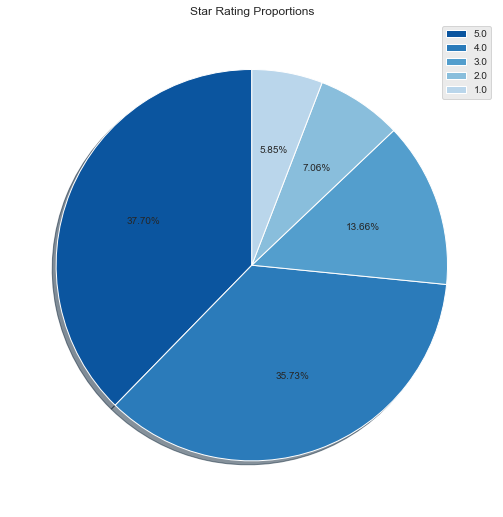

In [15]:
# add a threshold to the series object to cutoff the genres that have less than 1% frequency
plt.figure(figsize=FIG_SIZE)
plt.title("Star Rating Proportions")
colors = sns.color_palette("Blues")[::-1]
plt.pie(
    star_rating_counts.values,
    colors=colors,
    startangle=90,
    autopct="%1.2f%%",
    shadow=True,
)
plt.legend(star_rating_counts.index, loc="best")
plt.show()

Analyze the distribution of labels:

**<br>Real --> 1**
**<br>Fake --> -1**

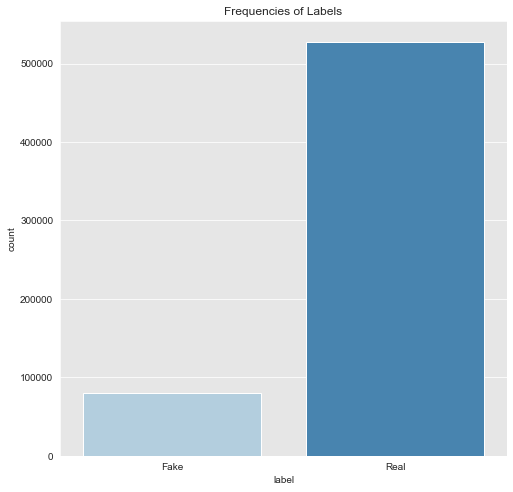

In [16]:
plt.figure(figsize=(8, 8))
sns.countplot(merged_zip["label"], palette="Blues")
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Frequencies of Labels")
plt.show()

In [17]:
label_counts = merged_zip.label.value_counts()

In [18]:
fake_label_percentage = label_counts.loc[-1] / label_counts.sum()
fake_label_percentage * 100

13.219997469007671

In [19]:
real_label_percentage = label_counts.loc[1] / label_counts.sum()
real_label_percentage * 100

86.78000253099233

Investigate the tokens and their statistics

In [20]:
all_words = merged_zip.review.str.split().str.len()

In [21]:
mean_review_length = all_words.mean()
min_review_length = all_words.min()
max_review_length = all_words.max()
median_review_length = all_words.median()
exceeding_count = len(all_words.loc[all_words.values > 512].index)
entries_count = len(merged_zip.index)

In [22]:
print(
    "Review Statistics (counting words) - \n\nMedian Length: {:.2f}\nMean Length: {:.2f}\nMax Lenght: {:.2f}\nMin Length: {:.2f}\nExceeding Ratio: {:.2f}%".format(
        median_review_length,
        mean_review_length,
        max_review_length,
        min_review_length,
        exceeding_count / entries_count * 100,
    )
)

Review Statistics (counting words) - 

Median Length: 85.00
Mean Length: 115.32
Max Lenght: 5333.00
Min Length: 1.00
Exceeding Ratio: 1.03%


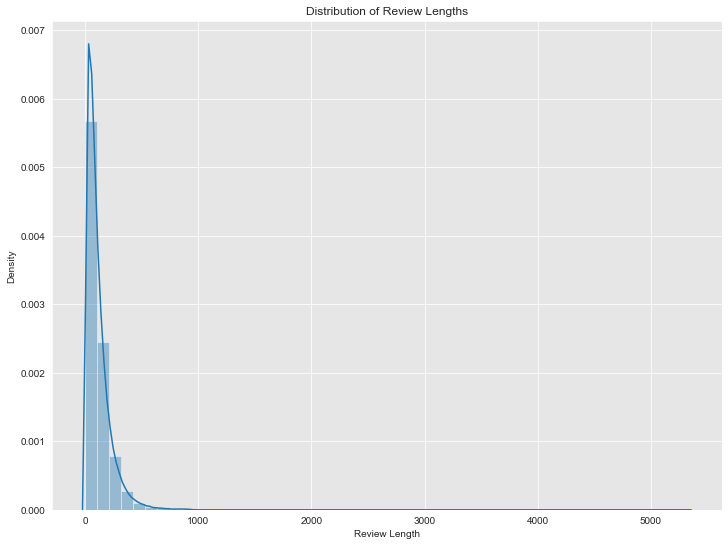

In [23]:
plt.figure(figsize=FIG_SIZE)
sns.distplot(all_words)
plt.xlabel("Review Length")
plt.title("Distribution of Review Lengths")
plt.show()

The resulting distribution is right-skewed, we need to investigate the usefullness of the outliers:

In [24]:
big_reviews_index = all_words.loc[all_words.values > 1000].index
big_reviews = merged_zip.filter(items=big_reviews_index, axis=0)
big_reviews

,userID,productID,rating,label,date,review
9561,14092,79,3.0,-1,2013-04-01,Sabarsky is much prettier and perhaps a bit le...
57709,49565,496,4.0,1,2006-05-26,"One of my favorite Bistros in NYC, very Parisi..."
133513,92780,1859,5.0,1,2014-03-05,You think I won't do it? I said as I looked up...
160619,105830,4223,2.0,1,2010-05-11,You gonna fight me over pizza ??? Some cheese ...
216676,48780,1419,4.0,1,2012-12-10,Small quaint local place. Opposite of a chain ...
278005,36832,4338,4.0,1,2012-08-07,From outside he never suspect that this is suc...
508123,60207,4196,5.0,1,2012-11-08,Love this spot! Stuck in a hotel while our hou...
548117,247452,3359,5.0,1,2013-07-06,Lexi is super efficient if you lack creativity...
571003,195189,4743,5.0,1,2012-09-06,I've been coming here for years. It's def my g...


In [25]:
one_words_index = all_words.loc[all_words.values == 1].index
one_word_reviews = merged_zip.filter(items=one_words_index, axis=0)
one_word_reviews

,userID,productID,rating,label,date,review
525,5569,7,4.0,1,2013-02-02,-
788,5832,9,1.0,-1,2014-07-08,EUH!
826,5870,9,1.0,-1,2013-09-07,ehh
833,5877,9,1.0,-1,2013-08-08,Dirty
939,5983,9,2.0,-1,2014-09-17,Overpriced!!!!!!!!!
...,...,...,...,...,...,...
604123,67857,1955,5.0,-1,2013-01-18,superb
604416,264020,1955,5.0,1,2011-04-01,:)
605571,264378,3487,1.0,-1,2012-08-22,Closed
606309,264649,5025,5.0,1,2012-11-19,Awesome!


We can create a vocabulary to understand what kind of words there are in the lexicon in case of one word reviews

In [26]:
from tqdm import tqdm

tqdm.pandas()

In [27]:
def build_vocabulary(sentences, verbose=True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocabulary = {}
    for sentence in tqdm(sentences, disable=(not verbose)):
        for word in sentence:
            try:
                vocabulary[word] += 1
            except KeyError:
                vocabulary[word] = 1
    return vocabulary

In [28]:
sentences = one_word_reviews["review"].progress_apply(lambda x: x.split()).values
vocabulary = build_vocabulary(sentences)

for word in sorted(vocabulary, key=vocabulary.get, reverse=True):
    print(word, vocabulary[word])

100%|██████████| 948/948 [00:00<00:00, 211725.25it/s]

. 32
good 26
Delicious! 23
Great 17
Awesome 16
Excellent! 12
Yum! 12
Awesome! 12
Good 11
great 11
amazing 11
delicious! 11
Ok 11
Delicious 11
Amazing! 10
yum 10
:) 9
awesome 8
Excellent 8
Yummy 8
ok 8
Great! 7
Excellent. 7
Delicious. 7
Yum. 7
Meh. 6
delicious 6
amazing! 6
Amazing 6
YUM! 5
Awesome!!! 5
yummy 4
Yummy! 4
GREAT 4
Amazing!!! 4
Perfect. 4
Amazing. 4
Awesome. 4
Good. 4
meh 4
Overrated. 4
excellent 4
- 3
Perfection. 3
perfect 3
a 3
fantastic 3
yum! 3
Excellent!! 3
Amazing!! 3
Great. 3
.. 3
;) 3
Fantastic! 3
yummy! 3
Outstanding. 3
Delicious!!! 3
Yum 3
A+ 3
overrated 3
Favorite! 3
Ugh 2
Bravo! 2
Brunch! 2
Delicious!!!! 2
Yuck 2
I 2
Disappointed 2
! 2
Phenomenal. 2
:( 2
YES 2
perfection 2
Yum!! 2
love 2
GREAT! 2
Duh. 2
Lovely! 2
LOVE 2
Cool 2
Mmmm 2
Sucks 2
nice 2
overrated! 2
h 2
Food 2
A 2
solid. 2
yum. 2
Love! 2
Awesomeness 2
N 2
Yummy!! 2
Nice! 2
Fantastic!!! 2
awesome! 2
Classic. 2
Awesome!! 2
Good! 2
amazing. 2
Underwhelming 2
Closed 2
crack. 2
Classic 2
Good!! 2
Yummy. 2


Look what is the label distribution for one word reviews

In [29]:
label_counts = one_word_reviews.label.value_counts()
label_counts

 1    661
-1    287
Name: label, dtype: int64

Drop extremely large reviews since those are unlikely in production

In [30]:
# merged_zip = merged_zip.drop(index=one_words_index)
merged_zip = merged_zip.drop(index=big_reviews_index)

Delete all the urls, Chinese charachters, and one charachter reviews

In [31]:
merged_zip_copy = merged_zip.copy()

In [32]:
merged_zip_copy["review"] = merged_zip_copy["review"].replace(
    to_replace="[\u4E00-\u9FA5]", value="", regex=True
)

In [33]:
merged_zip_copy["review"] = merged_zip_copy["review"].replace(
    to_replace=r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)",
    value="",
    regex=True,
)

In [34]:
matched_reviews = merged_zip_copy[merged_zip_copy["review"].str.match(r"[A-Za-z]+")]

In [35]:
merged_zip = matched_reviews[matched_reviews["review"].map(len) > 1]
print(len(merged_zip.index))

600570


### Get Final Statistics

In [37]:
all_words_new = merged_zip.review.str.split().str.len()
all_charc_new = merged_zip.review.str.len()

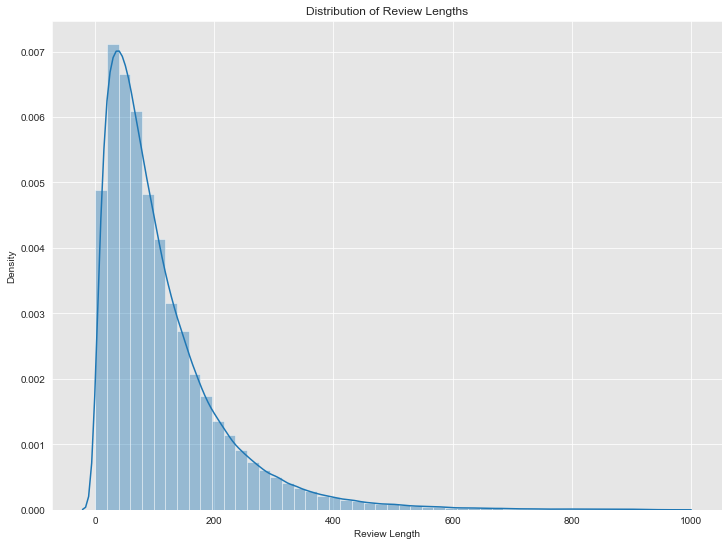

In [38]:
plt.figure(figsize=FIG_SIZE)
sns.distplot(all_words_new)
plt.xlabel("Review Length")
plt.title("Distribution of Review Lengths")
plt.show()

In [39]:
mean_review_length = all_words_new.mean()
min_review_length = all_words_new.min()
max_review_length = all_words_new.max()
median_review_length = all_words_new.median()
exceeding_count = len(all_words_new.loc[all_words_new.values > 512].index)
entries_count = len(all_words_new.index)

In [40]:
print(
    "Review Statistics (counting words) - \n\nMedian Length: {:.2f}\nMean Length: {:.2f}\nMax Lenght: {:.2f}\nMin Length: {:.2f}\nExceeding Ratio: {:.2f}%".format(
        median_review_length,
        mean_review_length,
        max_review_length,
        min_review_length,
        exceeding_count / entries_count * 100,
    )
)

Review Statistics (counting words) - 

Median Length: 83.00
Mean Length: 112.23
Max Lenght: 978.00
Min Length: 1.00
Exceeding Ratio: 0.94%


In [41]:
merged_zip_analysis = merged_zip.copy()

In [42]:
merged_zip_analysis["char length"] = all_charc_new
merged_zip_analysis["word length"] = all_words_new

In [43]:
merged_zip_analysis["label"] = merged_zip_analysis["label"].replace(
    to_replace=-1, value="fake"
)
merged_zip_analysis["label"] = merged_zip_analysis["label"].replace(
    to_replace=1, value="real"
)

In [44]:
analysis = merged_zip_analysis.groupby("label")[
    ["word length", "char length"]
].describe()
analysis

word length                                                         \
            count        mean         std  min   25%   50%    75%    max   
label                                                                      
fake      79842.0   84.830064   88.881273  1.0  29.0  59.0  109.0  978.0   
real     520728.0  116.425514  105.137310  1.0  45.0  87.0  153.0  976.0   

      char length                                                            
            count        mean         std  min    25%    50%    75%     max  
label                                                                        
fake      79842.0  459.454886  479.985610  2.0  159.0  318.0  590.0  4988.0  
real     520728.0  632.561460  572.654923  2.0  248.0  470.0  831.0  5000.0

In [45]:
# import dataframe_image as dfi

# analysis = analysis.style.background_gradient() #adding a gradient based on values in cell
# dfi.export(analysis, 'dataframe.png')

Encode star ratings into sentiment labels

In [46]:
merged_zip["sentiment label"] = merged_zip["rating"].apply(lambda x: 0 if x <= 3 else 1)
merged_zip.head()

,userID,productID,rating,label,date,review,sentiment label
0,5045,0,1.0,-1,2014-09-08,This was the worst experience I've ever had a ...,0
1,5046,0,3.0,-1,2013-10-06,This is located on the site of the old Spruce ...,0
2,5047,0,5.0,-1,2014-11-30,I enjoyed coffee and breakfast twice at Toast ...,1
3,5048,0,5.0,-1,2014-08-28,I love Toast! The food choices are fantastic -...,1
4,5049,0,5.0,-1,2013-07-16,The egg on an English muffin (their take on eg...,1


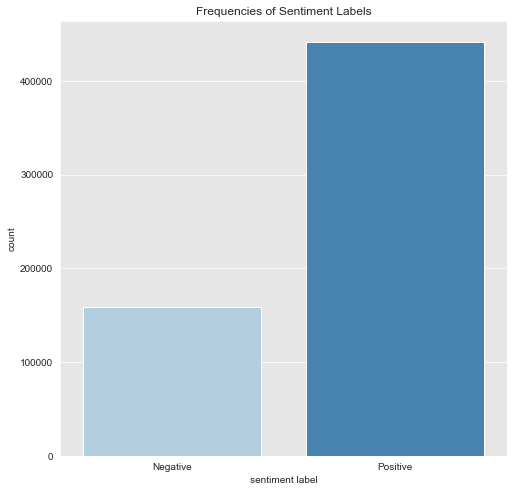

In [47]:
plt.figure(figsize=(8, 8))
sns.countplot(merged_zip["sentiment label"], palette="Blues")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("Frequencies of Sentiment Labels")
plt.show()

### Sampling

Before sampling the data leave out one of the restaurants for the final application testing

In [48]:
production_set = merged_zip.loc[merged_zip["productID"] == 1814]
production_set.head()

,userID,productID,rating,label,date,review,sentiment label
203345,125274,1814,1.0,-1,2014-12-01,"Just left the spotted pig, where they should a...",0
203346,125275,1814,1.0,-1,2014-11-21,"The food is good, the atmosphere convivial, an...",0
203347,125276,1814,1.0,-1,2014-11-11,"First impression counts, the host, obviously t...",0
203348,125277,1814,1.0,-1,2014-11-07,express auto at 2 prospect st metuchen with mi...,0
203349,125278,1814,1.0,-1,2014-10-23,Resorts World in Queens is DEFINITELY STINGY w...,0


In [49]:
production_set.to_csv(
    Path.joinpath(PATH_TO_DATASETS, "production_set.csv"), encoding="utf-8", index=False
)

In [50]:
sample_production_set = production_set.sample(n=200, random_state=1984)
sample_production_set

,userID,productID,rating,label,date,review,sentiment label
205231,126148,1814,2.0,1,2009-09-12,This place gets two stars because the waitress...,0
204235,38342,1814,4.0,1,2013-07-03,Wow.,1
203918,125675,1814,5.0,1,2014-08-04,One of the best burgers I've ever had the plea...,1
204864,126017,1814,4.0,1,2011-03-14,My eyes filled with tears of joy when my pig e...,1
205276,17426,1814,4.0,1,2009-05-15,"mmmm Speckled Hen beerrrr , but so much better =)",1
...,...,...,...,...,...,...,...
203376,38349,1814,1.0,-1,2010-10-10,So every now and then you go to a place that r...,0
203348,125277,1814,1.0,-1,2014-11-07,express auto at 2 prospect st metuchen with mi...,0
203370,125298,1814,1.0,-1,2012-01-04,Roquefort on a beef patty has existed for abou...,0
203948,125694,1814,5.0,1,2014-07-10,I don't get how people can give this place any...,1


In [51]:
sample_production_set.to_csv(
    Path.joinpath(PATH_TO_DATASETS, "sample_production_set.csv"),
    encoding="utf-8",
    index=False,
)

Get the data without the production set so we do not accidentaly train on it

In [52]:
merged_zip_without_1814 = merged_zip.drop(
    merged_zip[merged_zip["productID"] == 1814].index
)

600K instances is a bit of an overkill and would take unresonably long to train and evaluate, especially with the time constraits of this course. We have decided to sample 100k instances for the training and testing data.

In [53]:
sample_training_50_50 = merged_zip_without_1814.groupby("sentiment label").apply(
    lambda x: x.sample(n=50000, random_state=1984)
)
sample_training_50_50 = sample_training_50_50.set_index("sentiment label").reset_index()

In [54]:
sample_training_50_50

,sentiment label,userID,productID,rating,label,date,review
0,0,196513,3811,3.0,1,2013-08-17,Solid breakfast menu. For people who actually ...
1,0,36673,4329,2.0,1,2012-08-05,FOOD: the dumplings (dim sum) were not that i...
2,0,7069,4723,3.0,1,2013-06-26,The food was good. I was looking for an inexpe...
3,0,170452,1433,3.0,1,2010-04-21,Unique ambiance and good quality food (althoug...
4,0,240669,4743,1.0,-1,2012-03-24,We just got delivery from here after not havin...
...,...,...,...,...,...,...,...
99995,1,36124,2294,5.0,1,2010-06-18,"Hey Johny! ""Hey man!"" ""Fist bump!"" I love hear..."
99996,1,178412,2544,4.0,1,2013-11-08,"Every time I come back to NYC, this is one of ..."
99997,1,10339,2201,4.0,1,2011-05-23,Doma is just plain KEWL. The staff is thrilled...
99998,1,78686,2279,4.0,1,2013-03-12,Went here on a Sunday at around 4:00pm and the...


In [55]:
sample_training_50_50.to_csv(
    Path.joinpath(PATH_TO_DATASETS, "sentiment_sample_50_50.csv"),
    encoding="utf-8",
    index=False,
)

In [56]:
sample_training_25_75 = merged_zip_without_1814.sample(n=100000, random_state=1984)
sample_training_25_75 = sample_training_25_75.set_index("sentiment label").reset_index()

In [57]:
sample_training_25_75

,sentiment label,userID,productID,rating,label,date,review
0,0,258836,5007,1.0,1,2014-08-25,Crap!!!!! Bad pours of the beers & the German ...
1,0,46553,481,2.0,1,2014-06-21,My husband and I ordered a cheesecake square a...
2,1,42562,1397,4.0,1,2010-07-14,"This is one of my favorite carts on Prospect, ..."
3,1,234400,4169,5.0,1,2012-01-08,Love this sandwich shop! All of the ingredien...
4,1,76304,940,5.0,1,2014-03-24,Atmosphere is nice for a date. Food was delici...
...,...,...,...,...,...,...,...
99995,1,234731,4746,4.0,1,2012-12-18,"Like many other Yelpers, I LOVED the spinach g..."
99996,1,82049,4599,5.0,1,2014-07-09,"In the old days, Corona was a very Italian nei..."
99997,1,6229,1882,5.0,1,2012-06-14,Amazing Happy Hour food and
99998,1,10890,3522,5.0,1,2011-10-12,By the time I sunk my teeth into scalding wing...


In [58]:
sample_training_25_75.to_csv(
    Path.joinpath(PATH_TO_DATASETS, "sentiment_sample_25_75.csv"),
    encoding="utf-8",
    index=False,
)

In [59]:
star_rating_counts = sample_training_25_75["sentiment label"].value_counts()
star_rating_counts

1    73541
0    26459
Name: sentiment label, dtype: int64